In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

In [2]:
modification = pd.read_csv('rRNA_known.SD.csv')
psi_modification =  modification['hgla.position'].dropna().tolist()

In [3]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['arial']
plt.style.use('ggplot')
#sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'gray' # grayscale looks better

In [4]:
data = pd.read_csv("test.hgla.liver.2.rrna.18S.T.16mers.long_nano.dat", sep="\t")

#input_data = human_data.T.to_numpy()
data.shape
n_samples = data.shape[1]
print(data.columns)
print(data.shape)
data = data.iloc[0:200000, :]

signal_dim = 9

# 16 positions, 5 channels: A,C,G,T,deletion
input_shape_signal = (data.shape[0], signal_dim, 2)
print(input_shape_signal)

Index(['sample.ref', 'center.pos', 'read.seq', 'event.level', 'event.len',
       'ref.seq', 'model.level'],
      dtype='object')
(2374491, 7)
(200000, 9, 2)


In [5]:
data

,sample.ref,center.pos,read.seq,event.level,event.len,ref.seq,model.level
0,hgla.liver.2.rrna.18S.graphmap.1,21,TGCC-GGTAGCAT-TG,75.73 102.51 108.36 127.93 105.12 89.72 92.53 ...,0.00996 0.00498 0.00498 0.00830 0.00664 0.0043...,TGCCAGGTAGCATATG,71.08 91.80 115.66 119.51 107.54 92.91 105.36 ...
1,hgla.liver.2.rrna.18S.graphmap.1,26,GGTAGCAT-TGCACGT,89.72 92.53 108.12 87.49 90.94 80.44 81.02 92....,0.00432 0.00398 0.00996 0.00398 0.00896 0.0129...,GGTAGCATATGCTTGT,92.91 105.36 114.89 82.81 89.58 83.95 78.95 86...
2,hgla.liver.2.rrna.18S.graphmap.1,28,TAGCAT-TGCACGTCC,108.12 87.49 90.94 80.44 81.02 92.68 94.49 72....,0.00996 0.00398 0.00896 0.01295 0.00398 0.0049...,TAGCATATGCTTGTCT,114.89 82.81 89.58 83.95 78.95 86.67 109.23 79...
3,hgla.liver.2.rrna.18S.graphmap.1,31,CAT-TGCACGTCCCAA,80.44 81.02 92.68 94.49 72.57 79.83 91.04 103....,0.01295 0.00398 0.00498 0.01428 0.00432 0.0172...,CATATGCTTGTCTCAA,83.95 78.95 86.67 109.23 79.57 86.77 96.28 111...
4,hgla.liver.2.rrna.18S.graphmap.1,32,AT-TGCACGTCCCAAA,81.02 92.68 94.49 72.57 79.83 91.04 103.24 68....,0.00398 0.00498 0.01428 0.00432 0.01726 0.0112...,ATATGCTTGTCTCAAA,78.95 86.67 109.23 79.57 86.77 96.28 111.93 76...
...,...,...,...,...,...,...,...
199995,hgla.liver.2.rrna.18S.graphmap.1,1463,GTGGCGTTCAGCCACC,105.72 86.48 78.58 101.09 73.68 72.90 82.27 98...,0.00896 0.00631 0.01328 0.00432 0.00332 0.0066...,GTGGCGTTCAGCCACC,107.59 95.66 86.64 100.91 76.78 75.46 90.48 10...
199996,hgla.liver.2.rrna.18S.graphmap.1,1477,CCCGAGATTGAGCAAT,96.10 124.61 123.15 117.21 101.00 88.99 101.73...,0.01195 0.00697 0.00332 0.00232 0.00365 0.0049...,CCCGAGATTGAGCAAT,95.86 116.16 130.18 136.89 96.10 90.37 102.99 ...
199997,hgla.liver.2.rrna.18S.graphmap.1,1478,CCGAGATTGAGCAATA,124.61 123.15 117.21 101.00 88.99 101.73 120.5...,0.00697 0.00332 0.00232 0.00365 0.00498 0.0056...,CCGAGATTGAGCAATA,116.16 130.18 136.89 96.10 90.37 102.99 117.86...
199998,hgla.liver.2.rrna.18S.graphmap.1,1485,TGAGCAATAACAGGCC,105.63 118.83 84.87 108.57 87.30 84.95 94.54 9...,0.00797 0.00299 0.00564 0.00797 0.00564 0.0023...,TGAGCAATAACAGGTC,107.01 115.20 86.30 109.26 97.17 85.40 93.83 8...


In [6]:
data['psi'] = [1 if pos in psi_modification  else 0 for pos in data['center.pos']]

In [7]:
data

,sample.ref,center.pos,read.seq,event.level,event.len,ref.seq,model.level,psi
0,hgla.liver.2.rrna.18S.graphmap.1,21,TGCC-GGTAGCAT-TG,75.73 102.51 108.36 127.93 105.12 89.72 92.53 ...,0.00996 0.00498 0.00498 0.00830 0.00664 0.0043...,TGCCAGGTAGCATATG,71.08 91.80 115.66 119.51 107.54 92.91 105.36 ...,0
1,hgla.liver.2.rrna.18S.graphmap.1,26,GGTAGCAT-TGCACGT,89.72 92.53 108.12 87.49 90.94 80.44 81.02 92....,0.00432 0.00398 0.00996 0.00398 0.00896 0.0129...,GGTAGCATATGCTTGT,92.91 105.36 114.89 82.81 89.58 83.95 78.95 86...,0
2,hgla.liver.2.rrna.18S.graphmap.1,28,TAGCAT-TGCACGTCC,108.12 87.49 90.94 80.44 81.02 92.68 94.49 72....,0.00996 0.00398 0.00896 0.01295 0.00398 0.0049...,TAGCATATGCTTGTCT,114.89 82.81 89.58 83.95 78.95 86.67 109.23 79...,0
3,hgla.liver.2.rrna.18S.graphmap.1,31,CAT-TGCACGTCCCAA,80.44 81.02 92.68 94.49 72.57 79.83 91.04 103....,0.01295 0.00398 0.00498 0.01428 0.00432 0.0172...,CATATGCTTGTCTCAA,83.95 78.95 86.67 109.23 79.57 86.77 96.28 111...,0
4,hgla.liver.2.rrna.18S.graphmap.1,32,AT-TGCACGTCCCAAA,81.02 92.68 94.49 72.57 79.83 91.04 103.24 68....,0.00398 0.00498 0.01428 0.00432 0.01726 0.0112...,ATATGCTTGTCTCAAA,78.95 86.67 109.23 79.57 86.77 96.28 111.93 76...,0
...,...,...,...,...,...,...,...,...
199995,hgla.liver.2.rrna.18S.graphmap.1,1463,GTGGCGTTCAGCCACC,105.72 86.48 78.58 101.09 73.68 72.90 82.27 98...,0.00896 0.00631 0.01328 0.00432 0.00332 0.0066...,GTGGCGTTCAGCCACC,107.59 95.66 86.64 100.91 76.78 75.46 90.48 10...,0
199996,hgla.liver.2.rrna.18S.graphmap.1,1477,CCCGAGATTGAGCAAT,96.10 124.61 123.15 117.21 101.00 88.99 101.73...,0.01195 0.00697 0.00332 0.00232 0.00365 0.0049...,CCCGAGATTGAGCAAT,95.86 116.16 130.18 136.89 96.10 90.37 102.99 ...,0
199997,hgla.liver.2.rrna.18S.graphmap.1,1478,CCGAGATTGAGCAATA,124.61 123.15 117.21 101.00 88.99 101.73 120.5...,0.00697 0.00332 0.00232 0.00365 0.00498 0.0056...,CCGAGATTGAGCAATA,116.16 130.18 136.89 96.10 90.37 102.99 117.86...,0
199998,hgla.liver.2.rrna.18S.graphmap.1,1485,TGAGCAATAACAGGCC,105.63 118.83 84.87 108.57 87.30 84.95 94.54 9...,0.00797 0.00299 0.00564 0.00797 0.00564 0.0023...,TGAGCAATAACAGGTC,107.01 115.20 86.30 109.26 97.17 85.40 93.83 8...,0


In [8]:
psi_counts = data['psi'].value_counts()

print(psi_counts)

0    186296
1     13704
Name: psi, dtype: int64


In [9]:
data['event.level'].dtype

dtype('O')

In [10]:
# 1hot encoding of sequences
X_train_signal = np.zeros(input_shape_signal)


#print(data['event.level'].head(3))
data['event.level'] = data['event.level'].astype(str)
data['event.len'] = data['event.len'].astype(str)
#print(data['event.level'].head(3))

for i in range(0, data.shape[0]):
    X_train_signal[i,:,0] = np.array(data['event.level'][i].split(" "))
    X_train_signal[i,:,1] = np.array(data['event.len'][i].split(" "))

In [11]:
type(X_train_signal)

numpy.ndarray

In [12]:
print(X_train_signal[1])
print(data['event.level'][1])
print(data['event.len'][1])
print(X_train_signal.shape)

[[8.9720e+01 4.3200e-03]
 [9.2530e+01 3.9800e-03]
 [1.0812e+02 9.9600e-03]
 [8.7490e+01 3.9800e-03]
 [9.0940e+01 8.9600e-03]
 [8.0440e+01 1.2950e-02]
 [8.1020e+01 3.9800e-03]
 [9.2680e+01 4.9800e-03]
 [9.4490e+01 1.4280e-02]]
89.72 92.53 108.12 87.49 90.94 80.44 81.02 92.68 94.49
0.00432 0.00398 0.00996 0.00398 0.00896 0.01295 0.00398 0.00498 0.01428
(200000, 9, 2)


In [18]:
# output_shape_signal = (data.shape[0], signal_dim,  1)
# Y_train_signal = np.zeros(output_shape_signal)

# data['model.level'] = data['model.level'].astype(str)
# #print(data['event.level'].head(3))

# for i in range(0, data.shape[0]):
#     Y_train_signal[i,:,0] = np.array(data['model.level'][i].split(" "))

# Y_train_signal.shape

(200000, 9, 1)

In [19]:
# type(Y_train_signal)

numpy.ndarray

In [20]:
# print(Y_train_signal[1])

[[ 92.91]
 [105.36]
 [114.89]
 [ 82.81]
 [ 89.58]
 [ 83.95]
 [ 78.95]
 [ 86.67]
 [109.23]]


In [13]:
input_shape_seq = (data.shape[0], 16, 5)
output_shape_seq = input_shape_seq

In [14]:
X_train_seq = np.zeros(input_shape_seq)
data['read.seq'] = data['read.seq'].astype(str)
for i in range(0, data.shape[0]):
    seq = data.iloc[i,2]
    #print(seq)

    for c in range(0, len(seq)):
        if (seq[c] == "A"):
            X_train_seq[i,c,:] = [1,0,0,0,0]
        elif (seq[c] == "C"):
            X_train_seq[i,c,:] = [0,1,0,0,0]
        elif (seq[c] == "G"):
            X_train_seq[i,c,:] = [0,0,1,0,0]
        elif (seq[c] == "T"):
            X_train_seq[i,c,:] = [0,0,0,1,0]
        elif (seq[c] == "-"):
            X_train_seq[i,c,:] = [0,0,0,0,1]
        


X_train_seq.shape

(200000, 16, 5)

In [15]:
# Y_train_seq = np.zeros(output_shape_seq)
# data['ref.seq'] = data['ref.seq'].astype(str)
# for i in range(0, data.shape[0]):
#     seq = data.iloc[i,4]
#     #print(seq)

#     for c in range(0, len(seq)):
#         if (seq[c] == "A"):
#             Y_train_seq[i,c,:] = [1,0,0,0,0]
#         elif (seq[c] == "C"):
#             Y_train_seq[i,c,:] = [0,1,0,0,0]
#         elif (seq[c] == "G"):
#             Y_train_seq[i,c,:] = [0,0,1,0,0]
#         elif (seq[c] == "T"):
#             Y_train_seq[i,c,:] = [0,0,0,1,0]
#         elif (seq[c] == "-"):
#             Y_train_seq[i,c,:] = [0,0,0,0,1]
        


# Y_train_seq.shape

In [16]:
Y_train = data['psi']
Y_train.shape

(200000,)

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, BatchNormalization, UpSampling1D, Cropping1D
from tensorflow.keras.layers import Activation, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [18]:
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Activation, LSTM, Bidirectional, Concatenate, Input, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras import metrics
from keras import backend as K
from keras.layers import LeakyReLU
from keras import regularizers
from keras import initializers
from keras.layers import Reshape


In [19]:
params = {
          'lr': 0.002,
          'input_dropout': 0.8,
          'num_filters1': 16,
          'num_filters2': 8,
          'num_filters3': 4,
          'dropout_prob': 0.5,
          'kernel_size1': 5,
          'kernel_size2': 7,
          'kernel_size3': 5,
          }

In [20]:
def sequence_branch(sequence_input, params):
    #input = Input(shape=(sequence_dim,5), name = "input")
    x = Dropout(params['input_dropout'])(sequence_input)

    # encoder
    x = Conv1D(filters = params['num_filters1'], kernel_size=params['kernel_size1'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="encoder_1")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(2)(x)
    x = Dropout(params['dropout_prob'])(x)
    x = Conv1D(filters = params['num_filters2'], kernel_size=params['kernel_size2'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="encoder_2")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.25)(x)
    x = Conv1D(filters = params['num_filters3'], kernel_size=params['kernel_size3'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="encoder_3")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    encoded = x

    x = Conv1D(filters = params['num_filters3'], kernel_size=params['kernel_size3'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="decoder_1")(encoded)
    x = Dropout(0.25)(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling1D(2)(x)
    x = Dropout(0.25)(x)
    x = Conv1D(filters = params['num_filters2'], kernel_size=params['kernel_size2'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="decoder_2")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling1D(2)(x)
    x = Dropout(0.25)(x)
    x = Conv1D(filters = 5, kernel_size=params['kernel_size1'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="decoder_3")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = Dropout(0.25)(x)
    #decoded = x
    decoded = Flatten()(x)
    return decoded

In [21]:
def signal_branch(signal_input, params):
    # 2 channels: event.signal, event.len
    #input = Input(shape=(signal_dim,2), name = "input")
    x = Dropout(params['input_dropout'])(signal_input)

    # encoder
    x = Conv1D(filters = params['num_filters1'], kernel_size=params['kernel_size1'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="sig_encoder_1")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(2, padding="same")(x)
    x = Dropout(params['dropout_prob'])(x)
    x = Conv1D(filters = params['num_filters2'], kernel_size=params['kernel_size2'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="sig_encoder_2")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(2, padding="same")(x)
    x = Dropout(params['dropout_prob'])(x)
    x = Conv1D(filters = params['num_filters3'], kernel_size=params['kernel_size3'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="sig_encoder_3")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    sig_encoded = x

    x = Conv1D(filters = params['num_filters3'], kernel_size=params['kernel_size3'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="sig_decoder_1")(sig_encoded)
    x = Dropout(0.25)(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # not so sure about this yet, but secures output dimension of 9
    x = UpSampling1D(3)(x)
    x = Dropout(params['dropout_prob'])(x)
    x = Conv1D(filters = params['num_filters2'], kernel_size=params['kernel_size2'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="sig_decoder_2")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(params['dropout_prob'])(x)
    x = Conv1D(filters = 1, kernel_size=params['kernel_size1'], 
    kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), padding="same", name="sig_decoder_3")(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = Dropout(params['dropout_prob'], name="sig_decoder")(x)
    #x = Cropping1D(cropping=((1), (0)))(x) 
    #sig_decoded = x
    sig_decoded = Flatten()(x)
    
    return sig_decoded

In [80]:
# generate multi-branch model
def nano_model(modes, params):
	"""This function assembles the model and performs the training.
	The architecture example in this function uses two different convolutional layers with shared parameters.
	"""

	sequence_inputs = []
	sequence_outputs = []

	sequence_dim = 16
	
	for mode in modes:

		if mode == "sequence":

			sequence_input = Input(shape = (sequence_dim, 5), name="sequence_input")
			sequence_output = sequence_branch(sequence_input, params)

			sequence_inputs.append(sequence_input)
			sequence_outputs.append(sequence_output)

		elif mode == "signal":

			signal_input = Input(shape = (signal_dim, 2), name="signal_input")
			signal_output = signal_branch(signal_input, params)

			sequence_inputs.append(signal_input)
			sequence_outputs.append(signal_output)

#######################################################################
	concatenated = keras.layers.concatenate(sequence_outputs)

	#out = Dense(units = 150, kernel_initializer = "he_normal", kernel_regularizer = regularizers.l2(0.00001))(concatenated)
	out = Dense(units = 100)(concatenated)
	out = LeakyReLU()(out)
	out = BatchNormalization()(out)
	out = Dropout(params['dropout_prob'], noise_shape = None, seed = None)(out)
	#out = Dense(units = 100, kernel_initializer = "he_normal", kernel_regularizer = regularizers.l2(0.00001))(out)
	out = Dense(units = 75)(out)
	out = LeakyReLU()(out)
	out = BatchNormalization()(out)
	out = Dropout(params['dropout_prob'], noise_shape = None, seed = None)(out)
	#out = Dense(units = 50, kernel_initializer = "he_normal", kernel_regularizer = regularizers.l2(0.00001))(out)
	out = Dense(units = 50)(out)
	out = LeakyReLU()(out)
	out = BatchNormalization()(out)
	out = Dropout(params['dropout_prob'], noise_shape = None, seed = None)(out)
	out = Dense(units=1, activation='sigmoid')(out)  
	print(out.shape)
	  
# ########################################################################                                                          
# 	# define model	
	print(sequence_inputs)
	print(sequence_outputs)
	nano_model = Model(inputs=sequence_inputs, outputs=out)

	#print("\t\t\tCompiling network components.\n")
	#sgd = SGD(lr = tmp_lr, decay = 1e-6, momentum = 0.9, nesterov = True)
	#rmsprop = RMSprop(lr=0.01)
	
	# compile model
	opt = Adam(lr=params['lr'])
	nano_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
	return nano_model


it may not be a good idea to use batch normalization and dropout in the same
network. The reason is that the statistics used to normalize the activations of the prior layer
may become noisy given the random dropping out of nodes during the dropout procedure.

In [81]:
# help(Conv1D)

# https://stats.stackexchange.com/questions/376464/convolutional-autoencoder-on-an-odd-size-image

# I solved this by adding a cropping layer in the end x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)    
# decoded = Cropping2D(cropping=((1, 0), (1, 0)), data_format=None)(x) 

# But if it is a semantic segmentation problem, should this not mess up your predictions at the edges? Since you are cropping at the very last layer.

# Convolutional layers are transforming information from input plain image to stacks of features. 
# Cropping away some these stacks at latest steps is 'a suboptimal' decision. 
# If you need cheap way to save this information, consider use pooling with non-symmetric padding like (0,1). 
# Sergey Skrebnev
#  Au



In [82]:
n_epochs = 20
batch_size = 256

#callbacks = [EarlyStopping(monitor = "val_loss", patience = 10, verbose = 0, restore_best_weights=True), History(), 
#TensorBoard('logs', write_graph = True, write_images= True)]
callbacks = [EarlyStopping(monitor = "val_loss", patience = 20, verbose = 0), ModelCheckpoint("checkpoints/sinal_best_model.h5"), History()]


In [83]:

nano_model_1 = nano_model(modes=['sequence','signal'], params=params)
nano_model_1.summary()


(None, 1)
[<KerasTensor: shape=(None, 16, 5) dtype=float32 (created by layer 'sequence_input')>, <KerasTensor: shape=(None, 9, 2) dtype=float32 (created by layer 'signal_input')>]
[<KerasTensor: shape=(None, 80) dtype=float32 (created by layer 'flatten_4')>, <KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'flatten_5')>]
Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, 16, 5)]      0           []                               
                                                                                                  
 dropout_34 (Dropout)           (None, 16, 5)        0           ['sequence_input[0][0]']         
                                                                                                  
 signal_input (InputLayer)      [(None, 9, 2)]      

                                                                                                  
 sig_decoder_2 (Conv1D)         (None, 9, 8)         232         ['dropout_46[0][0]']             
                                                                                                  
 up_sampling1d_7 (UpSampling1D)  (None, 16, 8)       0           ['activation_28[0][0]']          
                                                                                                  
 activation_34 (Activation)     (None, 9, 8)         0           ['sig_decoder_2[0][0]']          
                                                                                                  
 dropout_40 (Dropout)           (None, 16, 8)        0           ['up_sampling1d_7[0][0]']        
                                                                                                  
 dropout_47 (Dropout)           (None, 9, 8)         0           ['activation_34[0][0]']          
          

In [84]:
# implement grid search for batch size number of filters and filter size
param_grid = dict(batch_size=[10,20,30])

#for i param_grid

#history = nano_model_1.fit(X_train, Y_train, batch_size = 256, epochs = 20, shuffle = True, validation_split = 0.2, verbose = 1, callbacks = callbacks)
history = nano_model_1.fit(
    [X_train_seq, X_train_signal],  # list for 2 x train 
    Y_train,  # list for 2 y train
    batch_size=256,
    epochs=20,
    shuffle=True,
    validation_split=0.3,
    verbose=1,
    callbacks=callbacks
)


Epoch 1/20
547/547 [==============================] - 28s 41ms/step - loss: 0.4888 - accuracy: 0.8976 - val_loss: 0.2872 - val_accuracy: 0.9320
Epoch 2/20
547/547 [==============================] - 23s 42ms/step - loss: 0.2880 - accuracy: 0.9299 - val_loss: 0.2612 - val_accuracy: 0.9320
Epoch 3/20
547/547 [==============================] - 25s 45ms/step - loss: 0.2669 - accuracy: 0.9306 - val_loss: 0.2531 - val_accuracy: 0.9320
Epoch 4/20
547/547 [==============================] - 26s 48ms/step - loss: 0.2600 - accuracy: 0.9308 - val_loss: 0.2505 - val_accuracy: 0.9320
Epoch 5/20
547/547 [==============================] - 25s 45ms/step - loss: 0.2563 - accuracy: 0.9312 - val_loss: 0.2490 - val_accuracy: 0.9320
Epoch 6/20
547/547 [==============================] - 24s 44ms/step - loss: 0.2542 - accuracy: 0.9312 - val_loss: 0.2485 - val_accuracy: 0.9320
Epoch 7/20
547/547 [==============================] - 24s 44ms/step - loss: 0.2532 - accuracy: 0.9312 - val_loss: 0.2484 - val_accuracy:

In [178]:
# https://stackoverflow.com/questions/43533610/how-to-use-hyperopt-for-hyperparameter-optimization-of-keras-deep-learning-netwo

In [179]:
# input = layers.Input(shape=(32, 16, 3))

# # Encoder
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# # Decoder
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2D(6, (3, 3), activation="softmax", padding="same")(x)

# # Autoencoder
# autoencoder = Model(input, x)
# autoencoder.compile(opti
# mizer="adam", loss="binary_crossentropy")
# autoencoder.summary()

In [180]:
#nano_model_1.load_weights("checkpoints/best_model.h5")

In [27]:
pred = nano_model_1([X_train_seq,X_train_signal])
#print(pred.shape)

X_pred = pred.numpy()

#print(X_pred.shape)
#print(X_pred.reshape(200000, 9).shape)
print(X_pred[0:5,:])

[[0.06602781]
 [0.06602781]
 [0.06602781]
 [0.06602781]
 [0.06602781]]


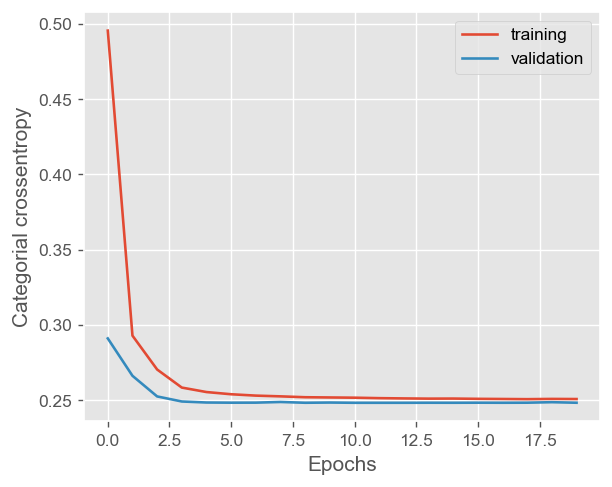

In [28]:
my_history = history
sparam = "1"
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize=(5,4))
ax1.plot(my_history.history["loss"], label = "training")
ax1.plot(my_history.history["val_loss"], label = "validation")
ax1.legend()
ax1.set(title='', xlabel='Epochs', ylabel = 'Categorial crossentropy')

fig.tight_layout()
fig_file = "sig.CNN.evaluation." + str(sparam) + ".pdf"
fig.savefig(fig_file)

In [47]:
#we have two branches now, which one should we select for encoder layers?

encoder = Model(nano_model_1.input, nano_model_1.layers[19].output)
print(encoder.summary())

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, 16, 5)]      0           []                               
                                                                                                  
 dropout (Dropout)              (None, 16, 5)        0           ['sequence_input[0][0]']         
                                                                                                  
 encoder_1 (Conv1D)             (None, 16, 16)       416         ['dropout[0][0]']                
                                                                                                  
 activation (Activation)        (None, 16, 16)       0           ['encoder_1[0][0]']              
                                                                                           

In [49]:
X_embed =  encoder.predict([X_train_seq, X_train_signal])

6250/6250 [==============================] - 6s 974us/step


In [62]:
yanocomp_data = pd.read_csv("hgla.liver.2_hgla.ivt.1.diff.rrna.18S.1.xls", sep="\t", header=0)
yanocomp_data

,rRNA.start,kmer,Unnamed: 2,G-test p-value,G-test FDR,Control sample estimated fraction modified,Treatment sample estimated fraction modified,KS statistic
0,1,NR_003278.3:CCTGG,3.28,2.500000e-40,2.800000e-40,0.40,0.95,0.58
1,2,NR_003278.3:CTGGT,2.35,9.500000e-59,1.100000e-58,0.43,0.89,0.37
2,3,NR_003278.3:TGGTT,2.99,5.000000e-68,5.600000e-68,0.54,0.96,0.27
3,4,NR_003278.3:GGTTG,-0.74,1.600000e-08,1.600000e-08,0.65,0.47,0.34
4,5,NR_003278.3:GTTGA,2.13,3.300000e-18,3.500000e-18,0.73,0.96,0.10
...,...,...,...,...,...,...,...,...
1580,1860,NR_003278.3:GGATC,-0.92,0.000000e+00,0.000000e+00,0.67,0.45,0.07
1581,1861,NR_003278.3:GATCA,1.07,1.300000e-23,1.300000e-23,0.00,0.00,0.15
1582,1862,NR_003278.3:ATCAT,-0.57,0.000000e+00,0.000000e+00,0.48,0.35,0.11
1583,1863,NR_003278.3:TCATT,-2.92,0.000000e+00,0.000000e+00,0.34,0.03,0.24


In [63]:

#sel = yano[(abs(yano['Unnamed: 2']) > 6 & yano['KS statistic'] > 0.1), :]
yano_sig = yanocomp_data[abs(yanocomp_data['Unnamed: 2']) > 8]
yano_sig_1 = yano_sig['rRNA.start']+3
yano_pos = yano_sig_1.to_list()

print(yano_pos.__len__())
#len(yano_pos)

#print(data["center.pos"][3])
#data.head(5)
yano_colors = []

96


In [64]:
yano_pos = [item for item in yano_pos if item not in psi_modification]

In [65]:

for i in range(0, X_embed[0:50000,:].shape[0]):
    if data["center.pos"][i] in psi_modification:
        yano_colors.append('red')
    elif data["center.pos"][i] in yano_pos:  
        yano_colors.append('blue')
    else:
        yano_colors.append('lightgray')

In [66]:
yano_colors.count('red')

3464

In [67]:
yano_colors.count('blue')

1635

In [68]:
yano_colors.count('lightgray')

44901

In [69]:
X_embed[0:50000,:].shape

(50000, 4, 4)

In [70]:
#ts_embed_1 = TSNE(n_components=3, perplexity=10).fit_transform(X_embed[0:50000,:].reshape(50000, 3*4))
ts_embed_2 = TSNE(n_components=2, perplexity=20).fit_transform(X_embed[0:50000,:].reshape(50000, 4*4))
#ts_embed_3 = TSNE(n_components=3, perplexity=30).fit_transform(X_embed[0:50000,:].reshape(50000, 3*4))


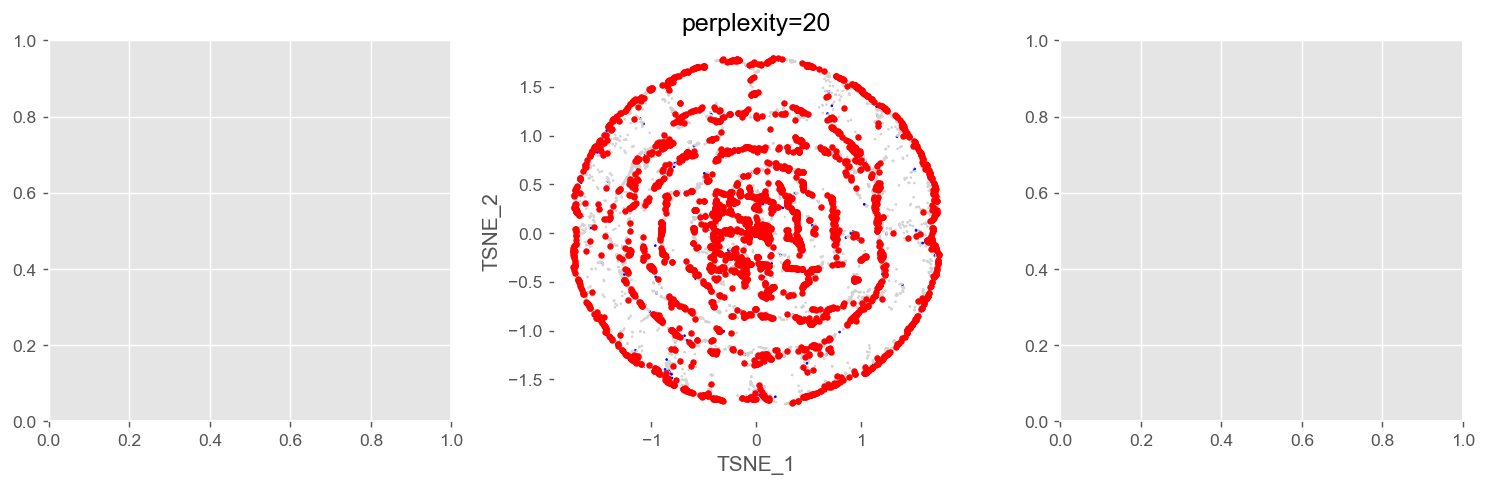

In [71]:


fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4))
# 2D
# ax1.scatter(ts_embed_1[:,0].tolist(), ts_embed_1[:,1].tolist(), s=1, color=yano_colors, label = "training")
# ax1.scatter(ts_embed_1[pd.Series(yano_colors) == "red", 0], ts_embed_1[pd.Series(yano_colors) == "red", 1], s=10, color="red")
# ax1.set_facecolor('white')
# #ax1.legend("yanocomp sig")
# ax1.set(title='perplexity=10', xlabel='TSNE_1', ylabel = 'TSNE_2')
ax2.scatter(ts_embed_2[:,0].tolist(), ts_embed_2[:,1].tolist(), s=1, color=yano_colors, label = "training")
ax2.scatter(ts_embed_2[pd.Series(yano_colors) == "red", 0], ts_embed_2[pd.Series(yano_colors) == "red", 1], s=10, color="red")
ax2.set_facecolor('white')
#ax2.legend("yanocomp sig")
ax2.set(title='perplexity=20', xlabel='TSNE_1', ylabel = 'TSNE_2')
# ax3.scatter(ts_embed_3[:,0].tolist(), ts_embed_3[:,1].tolist(), s=1, color=yano_colors, label = "training")
# ax3.scatter(ts_embed_3[pd.Series(yano_colors) == "red", 0], ts_embed_3[pd.Series(yano_colors) == "red", 1], s=10, color="red")
# ax3.set_facecolor('white')
# #ax3.legend("yanocomp sig")
# ax3.set(title='perplexity=30', xlabel='TSNE_1', ylabel = 'TSNE_2')

fig.tight_layout()
fig_file = "singal.X_embedding.2D.evaluation." + str(sparam) + ".pdf"
fig.savefig(fig_file)



In [73]:
import numpy as np
from sklearn.metrics import silhouette_score

# Mapping of colors to labels
color_to_label_map = {
    'red': 0,
    'blue': 1,
    'lightgray': 2
}

# Convert colors to labels based on the mapping
labels = np.array([color_to_label_map[color] for color in yano_colors])

# Create a filter to select data points with labels 'red' or 'gray'
red_gray_filter = (labels == 0) | (labels == 2)

# Select data points with labels 'red' and 'gray' using the filter
red_gray_data = ts_embed_2[red_gray_filter]

# Compute the silhouette score for data points with labels 'red' and 'gray'
red_gray_sil_score = silhouette_score(red_gray_data, labels[red_gray_filter])

print("Silhouette Score for 'red' and 'gray' data: ", red_gray_sil_score)

Silhouette Score for 'red' and 'gray' data:  -0.0053654886


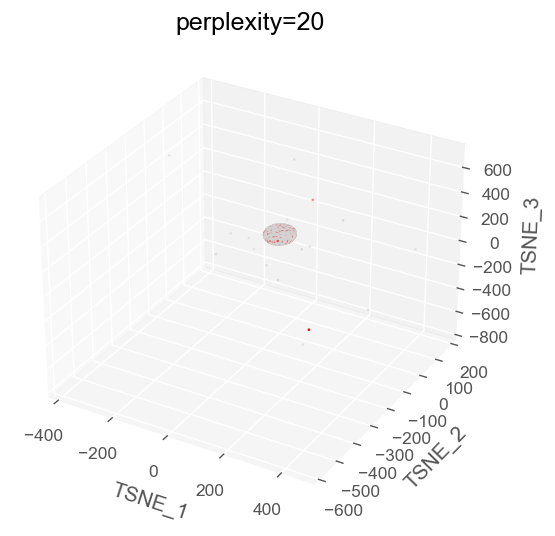

In [37]:
# 3D

fig = plt.figure(figsize=(12, 5))
#plt.figure(figsize=(16, 16))
# ax1 = fig.add_subplot(131, projection="3d")
# ax1.scatter(ts_embed_1[:, 0], ts_embed_1[:, 1], ts_embed_1[:,2], color=yano_colors, s=1)
# ax1.set_facecolor('white')
# ax1.set(title='perplexity=10', xlabel='TSNE_1', ylabel = 'TSNE_2', zlabel="TSNE_3")

ax2 = fig.add_subplot(132, projection="3d")
ax2.scatter(ts_embed_2[:, 0], ts_embed_2[:, 1], ts_embed_2[:,2], color=yano_colors, s=1)
ax2.set_facecolor('white')
ax2.set(title='perplexity=20', xlabel='TSNE_1', ylabel = 'TSNE_2', zlabel="TSNE_3")


# ax3 = fig.add_subplot(133, projection="3d")
# ax3.scatter(ts_embed_3[:, 0], ts_embed_3[:, 1], ts_embed_3[:,2], color=yano_colors, s=1)
# ax3.set_facecolor('white')
# ax3.set(title='perplexity=30', xlabel='TSNE_1', ylabel = 'TSNE_2', zlabel="TSNE_3")

#plt.scatter(z[:, 0], z[:, 1], s=20)
fig.tight_layout()

fig_file = "signal.X_embedding.3D.evaluation." + str(sparam) + ".pdf"
fig.savefig(fig_file)